## Task Definition

URL: https://www.kaggle.com/competitions/home-credit-default-risk/overview

### Description
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

### Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

### Submission File

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

## Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Function Definitions

In [112]:
def get_df_summary(df):
    
    # 1 Shape
    print('Shape: ', df.shape)
    print()
    
    # 2 Columns Summary
    df_summary = pd.DataFrame({
        'Type': df.dtypes,
        'Count not NA': df.count(),
        'Count NA': df.isna().sum(),
        '% NA': np.round(df.isna().sum()/(df.count() + df.isna().sum()), 2),
        'Count Unique': df.nunique(),
        'Unique Values (Categorical)': [
            ', '.join(map(str, df[col].unique())) if df[col].nunique() < 7 else None 
            for col in df.columns
        ]
    }, index=df.columns).sort_index()
    
    return df_summary


def get_column_description(column_name, column_descriptions=column_descriptions):
    
    return column_descriptions.query(f'Row in ({column_name})')

## Load Data

In [113]:
application_train = pd.read_csv('data/application_train.csv')
column_descriptions = pd.read_csv('data/HomeCredit_columns_description.csv', encoding='latin1')

application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [31]:
# Target value counts
application_train['TARGET'].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [56]:
# Summary
print('Summary (numeric columns):')
summary_df = get_df_summary(application_train)
summary_df

Summary (numeric columns):
Shape:  (307511, 122)



,Type,Count not NA,Count NA,% NA,Count Unique,Unique Values (Categorical)
AMT_ANNUITY,float64,307499,12,0.00,13672,None
AMT_CREDIT,float64,307511,0,0.00,5603,None
AMT_GOODS_PRICE,float64,307233,278,0.00,1002,None
AMT_INCOME_TOTAL,float64,307511,0,0.00,2548,None
AMT_REQ_CREDIT_BUREAU_DAY,float64,265992,41519,0.14,9,None
AMT_REQ_CREDIT_BUREAU_HOUR,float64,265992,41519,0.14,5,"0.0, nan, 1.0, 2.0, 3.0, 4.0"
AMT_REQ_CREDIT_BUREAU_MON,float64,265992,41519,0.14,24,None
AMT_REQ_CREDIT_BUREAU_QRT,float64,265992,41519,0.14,11,None
AMT_REQ_CREDIT_BUREAU_WEEK,float64,265992,41519,0.14,9,None
AMT_REQ_CREDIT_BUREAU_YEAR,float64,265992,41519,0.14,25,None


In [57]:
# columns num/cat
columns_cat = application_train.select_dtypes(include=object).columns.values
columns_num = application_train.select_dtypes(include=np.number).columns.values
# columns num/cat without NA
columns_cat_no_NA = application_train[columns_no_NA].select_dtypes(include=object).columns.values
columns_num_no_NA = application_train[columns_no_NA].select_dtypes(include=np.number).columns.values

print(len(columns_cat))
print(len(columns_num))
print(len(columns_cat_no_NA))
print(len(columns_num_no_NA))

16
106
11
54


### Correlation between target and numeric columns without NA

<Axes: >

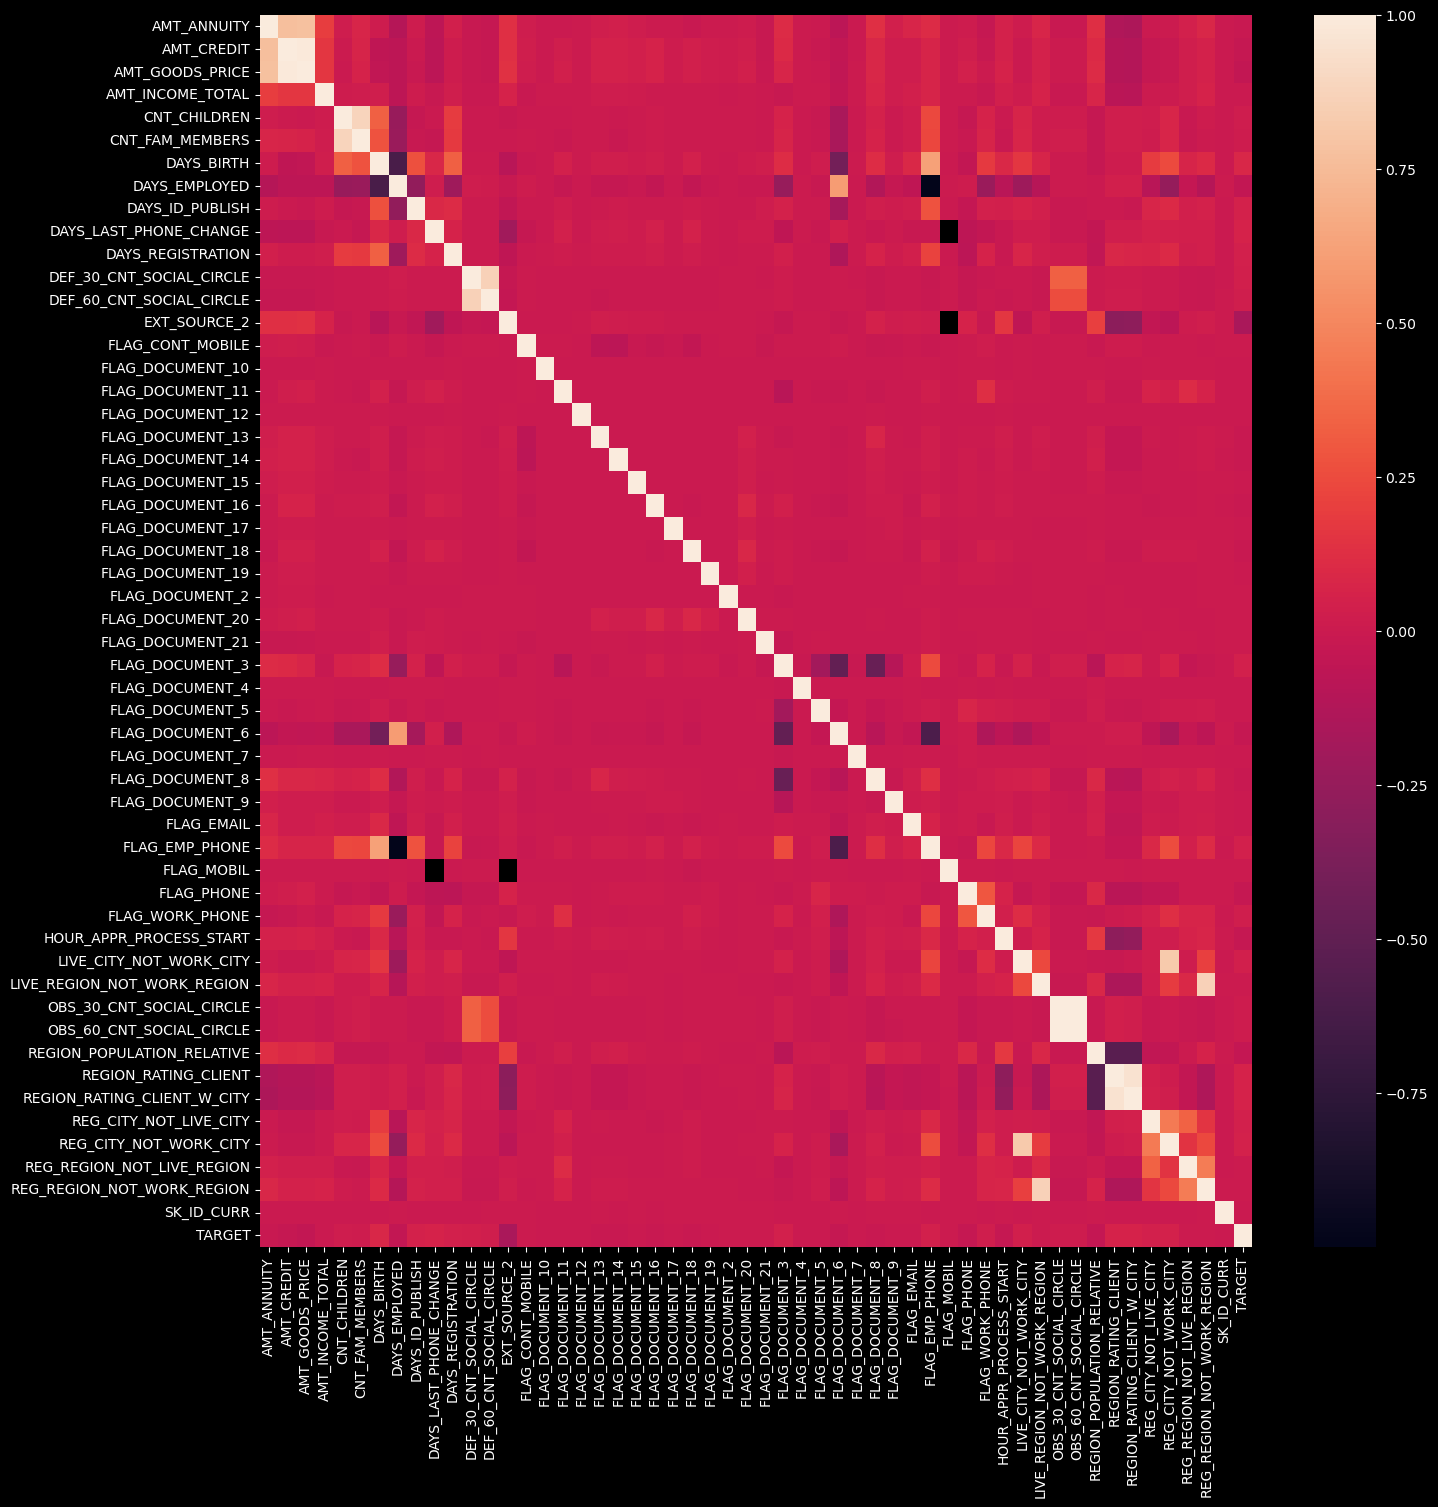

In [59]:
# corr between columns without NA
corr_matrix = application_train[columns_num_no_NA].corr()
plt.figure(figsize=[16,16])
sns.heatmap(corr_matrix)

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_38434/1848022073.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=col, hue='TARGET', data=df_vis, ax=ax, palette={0: 'steelblue', 1: 'red'})
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_38434/1848022073.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=col, hue='TARGET', data=df_vis, ax=ax, palette={0: 'steelblue', 1: 'red'})
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_38434/1848022073.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=col, hue='TARGET', data=df_vis, ax=ax, palette={0: 'steelblue', 1: 'red'})
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_38434/1848022073.py:8: UserWarning: Dataset has 0 variance; skipping densi

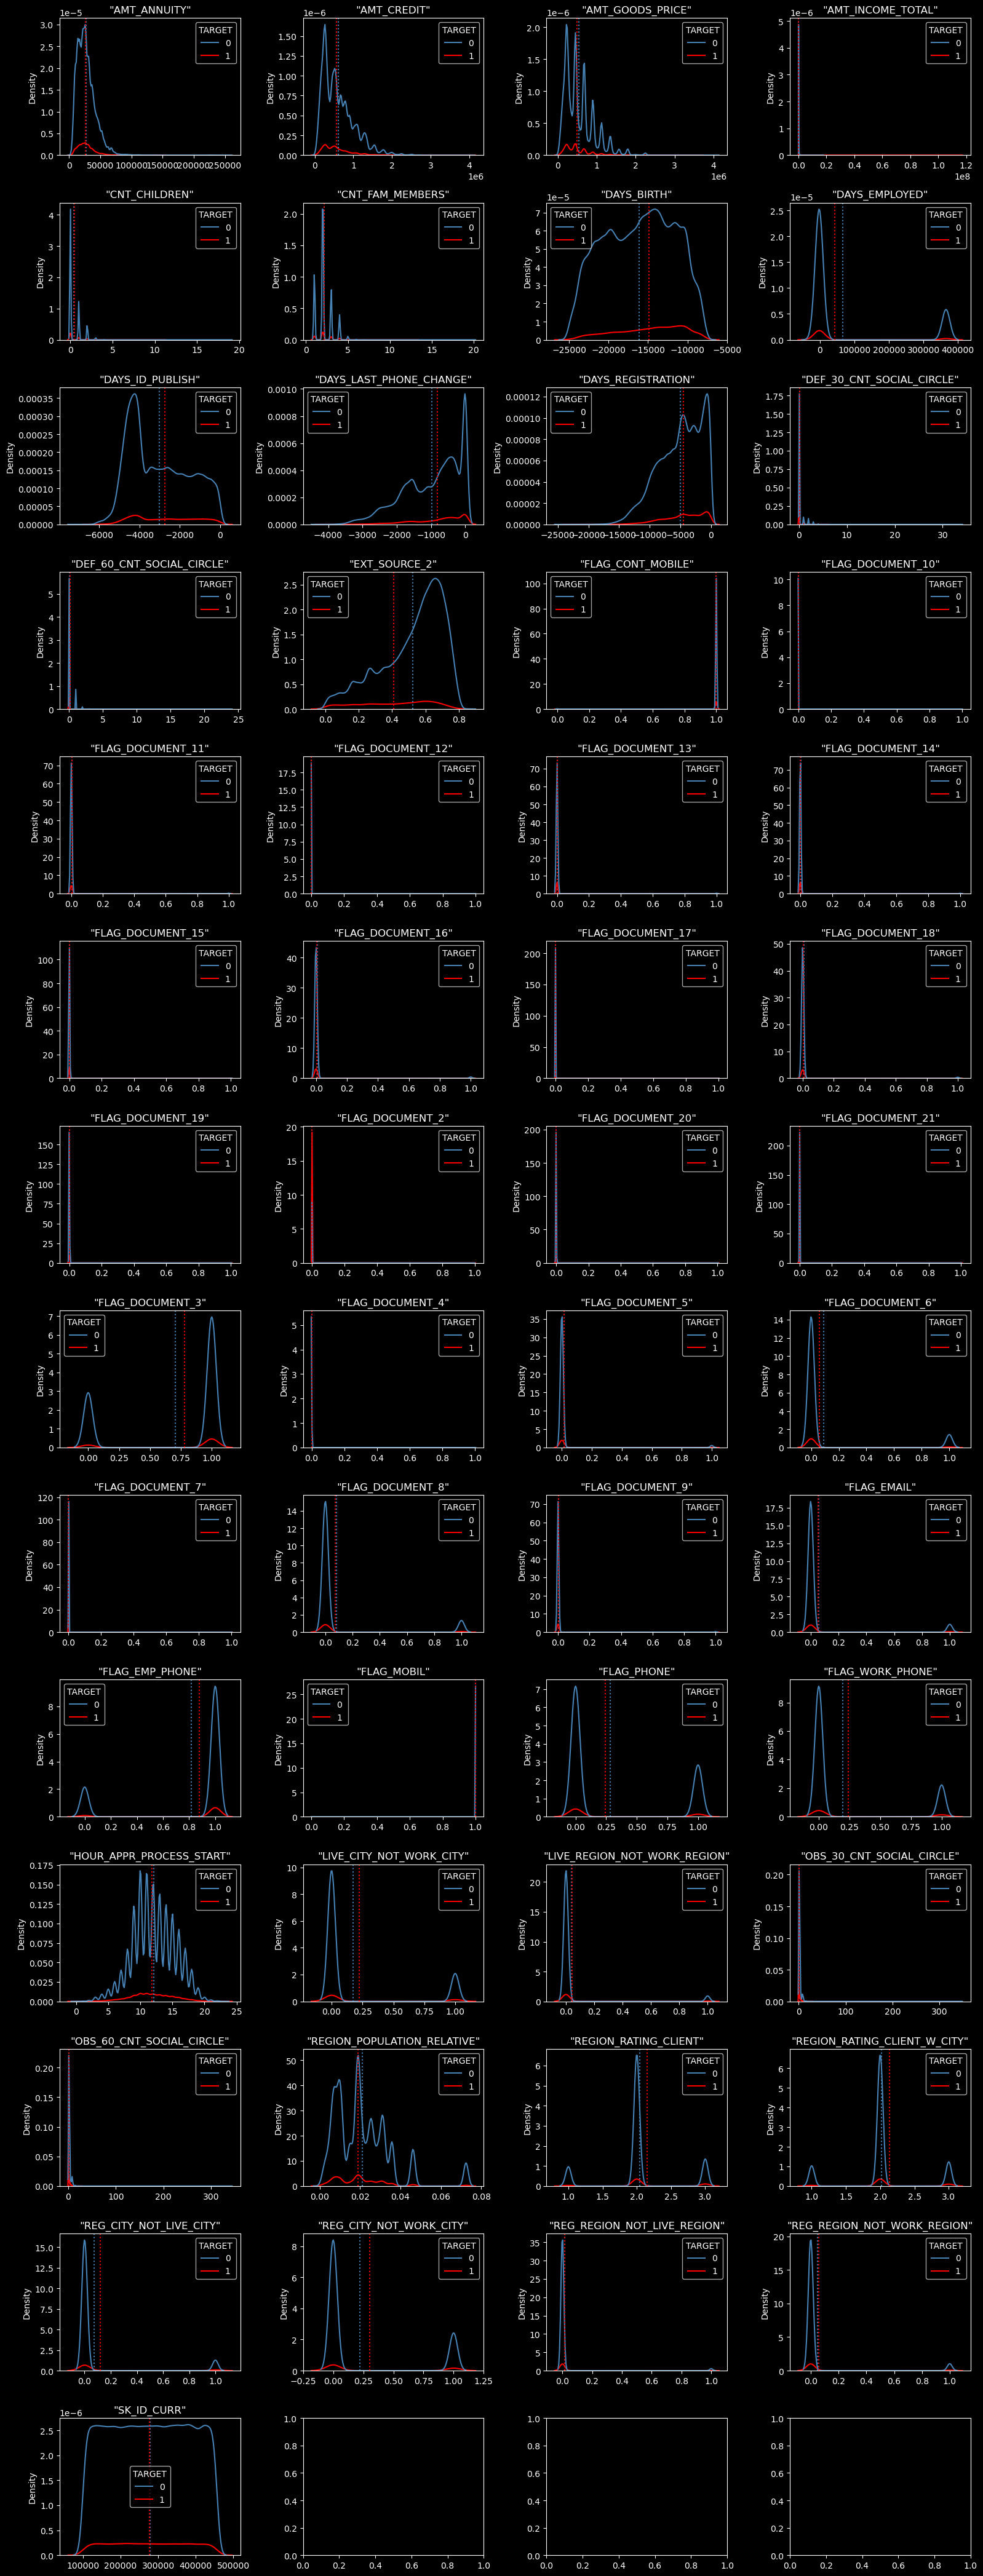

In [93]:
ncols = 4
nplots = len(columns_num_no_NA)
nrows = (nplots // ncols) + 1
fig, axes = plt.subplots(figsize=(16, nrows*3), ncols=ncols, nrows=nrows)
for i, (col, ax) in enumerate(zip(columns_num_no_NA[columns_num_no_NA != 'TARGET'], axes.ravel())):
    #print(col)
    df_vis = application_train[[col, 'TARGET']]
    sns.kdeplot(x=col, hue='TARGET', data=df_vis, ax=ax, palette={0: 'steelblue', 1: 'red'})
    mean_0 = df_vis[df_vis['TARGET'] == 0][col].mean()
    mean_1 = df_vis[df_vis['TARGET'] == 1][col].mean()
    ax.axvline(x=mean_0, color='steelblue', ls=':')
    ax.axvline(x=mean_1, color='red', ls=':')
    ax.set_title(f'"{col}"')
    ax.set_xlabel('')
    # if i == 7:
    #     break


plt.tight_layout()
plt.show()

In [97]:
print(application_train.groupby(by=['TARGET'])['FLAG_WORK_PHONE'].mean())
print(application_train.groupby(by=['TARGET'])['EXT_SOURCE_2'].mean())

TARGET
0    0.195991
1    0.237825
Name: FLAG_WORK_PHONE, dtype: float64
TARGET
0    0.523479
1    0.410935
Name: EXT_SOURCE_2, dtype: float64


In [116]:
get_column_description(column_name=["EXT_SOURCE_2", "FLAG_WORK_PHONE", 'TARGET'])

,Unnamed: 0,Table,Row,Description,Special
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
24,27,application_{train|test}.csv,FLAG_WORK_PHONE,"Did client provide home phone (1=YES, 0=NO)",NaN
42,45,application_{train|test}.csv,EXT_SOURCE_2,Normalized score from external data source,normalized
